In [37]:
import gpxpy
import matplotlib.pyplot as plt

In [38]:
route_all_filename = "gpx/route_all.gpx"
route_all_gpx = gpxpy.parse(open(route_all_filename))
# combine all tracks and segments into one segment
route_all = []
for track in route_all_gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_all.append(point)


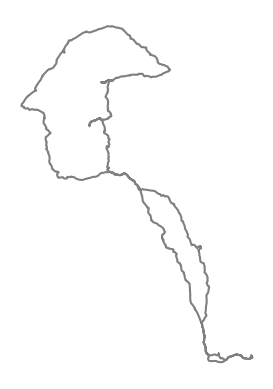

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)

xs = [point.longitude for point in route_all]
ys = [point.latitude for point in route_all]
ax.plot(xs, ys, "grey")

ax.set_aspect(1 / 0.55919290347) # 1 / cos(56 deg)
plt.axis("off")
plt.show()

fig.patch.set_visible(False)
fig.savefig("./images/route_all.svg", format="svg", bbox_inches="tight")

In [40]:
route_alfie_filename = "gpx/route_alfie.gpx"
route_robyn_filename = "gpx/route_robyn.gpx"
route_alfie_gpx = gpxpy.parse(open(route_alfie_filename))
route_robyn_gpx = gpxpy.parse(open(route_robyn_filename))
colour_alfie = "#739"
colour_robyn = "#739122"


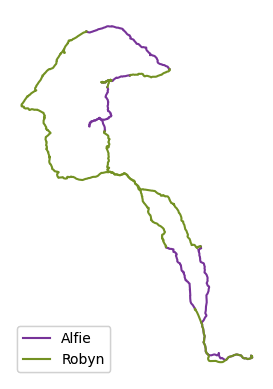

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)

for (route_gpx, colour) in zip(
    [route_alfie_gpx, route_robyn_gpx],
    [colour_alfie, colour_robyn],
    ):
    for track in route_gpx.tracks:
        for segment in track.segments:
            xs = [point.longitude for point in segment.points]
            ys = [point.latitude for point in segment.points]
            ax.plot(xs, ys, color=colour)

legend1 = ax.legend(
    [
        plt.Line2D([0], [0], color=colour_alfie),
        plt.Line2D([0], [0], color=colour_robyn),
    ],
    ["Alfie", "Robyn"],
    loc="lower left",
)
ax.add_artist(legend1)

ax.set_aspect(1 / 0.55919290347) # 1 / cos(56 deg)
plt.axis("off")
plt.show()

fig.patch.set_visible(False)
fig.savefig("./images/route_by_person.svg", format="svg", bbox_inches="tight")